# Bonus: Temperature Analysis I

In [64]:
import pandas as pd
from datetime import datetime as dt

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

In [34]:
# "tobs" is "temperature observations"
df = pd.read_csv('Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [35]:
# Convert the date column format from string to datetime
df.dtypes

station     object
date        object
prcp       float64
tobs         int64
dtype: object

In [36]:
df['date']= pd.to_datetime(df['date'])

In [37]:
df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs                int64
dtype: object

In [38]:
# Set the date column as the DataFrame index
#df.set_index(['date'], inplace = True)
#df.head()

In [39]:
# Drop the date column (Not sure why this is part of the starter directions?)
#df.reset_index(drop=True, inplace=True)
#df.head()

### Compare June and December data across all years 

In [40]:
from scipy import stats

In [43]:
# Filter data for desired months
june_df = df[df['date'].dt.month == 6]
december_df = df[df['date'].dt.month == 12]

june_df


,station,date,prcp,tobs
133,USC00519397,2010-06-01,0.00,78
134,USC00519397,2010-06-02,0.01,76
135,USC00519397,2010-06-03,0.00,78
136,USC00519397,2010-06-04,0.00,76
137,USC00519397,2010-06-05,0.00,77
...,...,...,...,...
19492,USC00516128,2017-06-26,0.02,79
19493,USC00516128,2017-06-27,0.10,74
19494,USC00516128,2017-06-28,0.02,74
19495,USC00516128,2017-06-29,0.04,76


In [51]:
december_df

,station,date,prcp,tobs
305,USC00519397,2010-12-01,0.04,76
306,USC00519397,2010-12-03,0.00,74
307,USC00519397,2010-12-04,0.00,74
308,USC00519397,2010-12-06,0.00,64
309,USC00519397,2010-12-07,0.00,64
...,...,...,...,...
19323,USC00516128,2016-12-27,0.14,71
19324,USC00516128,2016-12-28,0.14,71
19325,USC00516128,2016-12-29,1.03,69
19326,USC00516128,2016-12-30,2.37,65


In [47]:
# Identify the average temperature for June
june_temp_avg = june_df['tobs'].mean()
june_temp_avg

74.94411764705882

In [48]:
# Identify the average temperature for December
dec_temp_avg = december_df['tobs'].mean()
dec_temp_avg

71.04152933421226

In [50]:
# Create collections of temperature data
june_temps=june_df['tobs']
june_temps.describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: tobs, dtype: float64

In [52]:
dec_temps=december_df['tobs']
dec_temps.describe()

count    1517.000000
mean       71.041529
std         3.745920
min        56.000000
25%        69.000000
50%        71.000000
75%        74.000000
max        83.000000
Name: tobs, dtype: float64

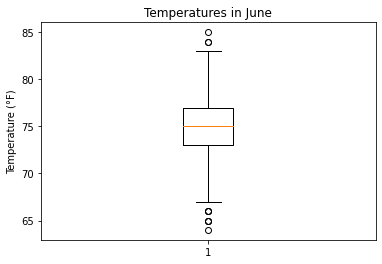

In [60]:
#june_temps.boxplot(column=['tobs'])
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures in June')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(june_temps)
plt.show()                                         

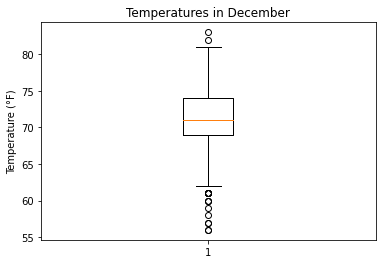

In [62]:
#December Temperatures
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures in December')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(dec_temps)
plt.show()                                         

In [70]:
# Run an unpaired t-test due to the fact that there are an unequal number of temperatures for June and December
#stats.ttest_rel(june_df['tobs'], december_df['tobs'], nan_policy = omit)

stats.ttest_ind(june_temps, dec_temps, equal_var=True)


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

### Analysis

In [ ]:
#The pvalue is extremely small, therefore we reject the null hypothesis 
#and conclude that a significant difference between the means does exist.